In [3]:


import pandas as pd


df = pd.read_csv('/content/tips (data for regression problem) (1).csv')


print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [5]:
print(df.describe())


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [6]:
print(df.shape)
print(df.isnull().sum())

(244, 7)
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


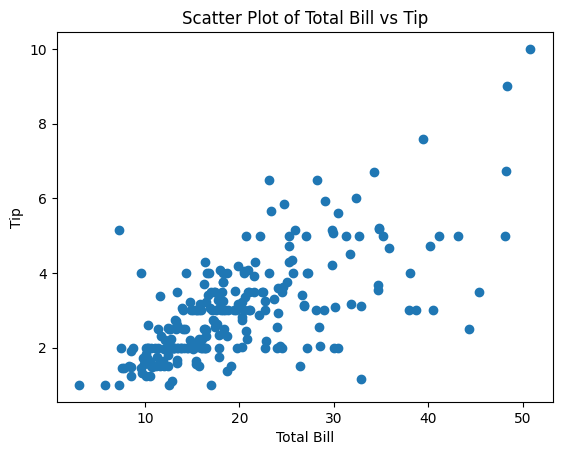

In [7]:


import matplotlib.pyplot as plt


plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

In [8]:

lineartest = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], prefix=['sex', 'smoker', 'day', 'time']).astype(float)


import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd

X = lineartest.drop(columns=['tip'])  # Drop the response variable from predictors
X = sm.add_constant(X)  # Adds an intercept term to the model
y = lineartest['tip']

model = sm.OLS(y, X).fit()

# Run the Rainbow test
test_stat, p_value = smd.linear_rainbow(model)
print(f"Rainbow Test Statistic: {test_stat}")
print(f"p-value: {p_value}")


Rainbow Test Statistic: 1.197054547994589
p-value: 0.1658838305924099


Since p>0.05 we reject the null hypothesis.

Null hypothesis:Linearity does'nt exist

Hence a linear trend exist here

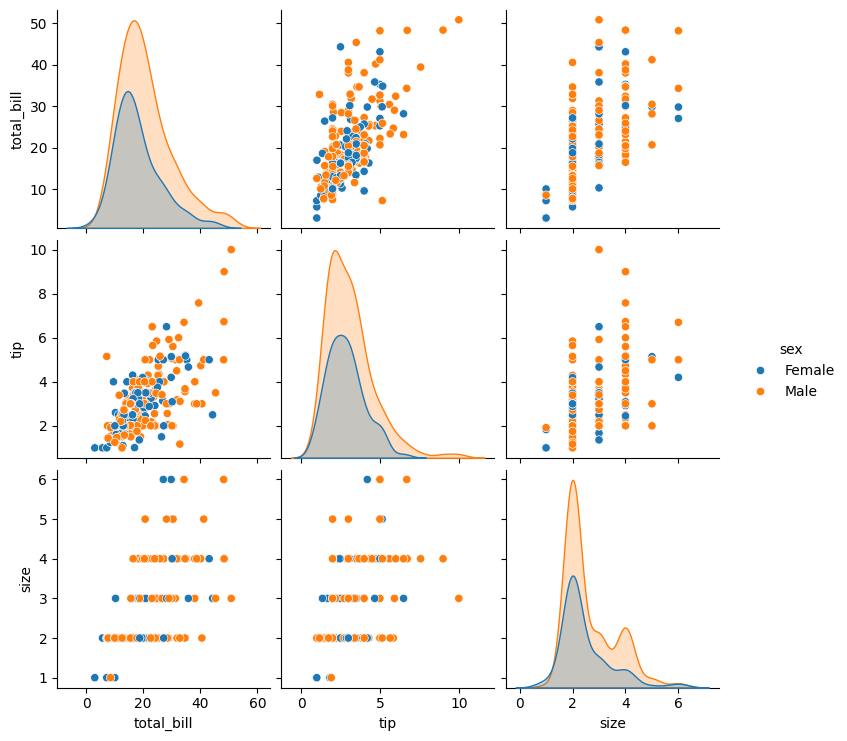

In [9]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.pairplot(df, hue='sex')
plt.show()

Males tend to have a slightly higher distribution of total bill amounts compared to females.

Male customers show slightly higher tip amounts on average than female customers.

The tip distribution is right-skewed, meaning that most tips are on the lower end, with only a few high tip amounts. This indicates that while high tips do occur, they are less common.


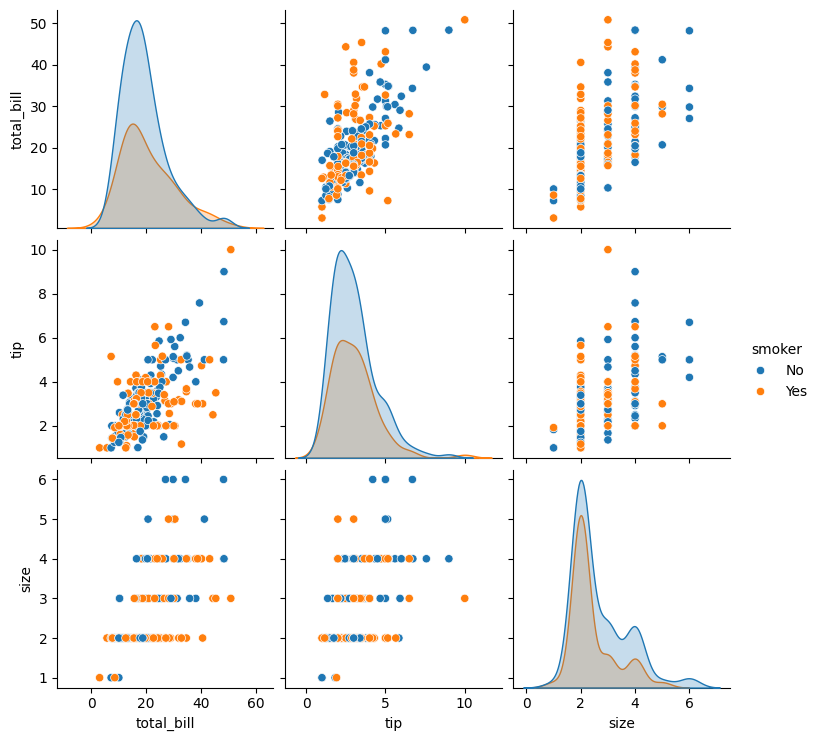

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



sns.pairplot(df, hue='smoker')
plt.show()

Non-smokers (blue points) appear to tip slightly more on higher bills compared to smokers (orange points).
Smokers show slightly more variability in tipping for a given bill amount, suggesting they may have less consistent tipping habits.


In [11]:

df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], prefix=['sex', 'smoker', 'day', 'time'])

print(df.head())

   total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0       16.99  1.01     2        True     False       True       False   
1       10.34  1.66     3       False      True       True       False   
2       21.01  3.50     3       False      True       True       False   
3       23.68  3.31     2       False      True       True       False   
4       24.59  3.61     4        True     False       True       False   

   day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0    False    False     True     False         True       False  
1    False    False     True     False         True       False  
2    False    False     True     False         True       False  
3    False    False     True     False         True       False  
4    False    False     True     False         True       False  


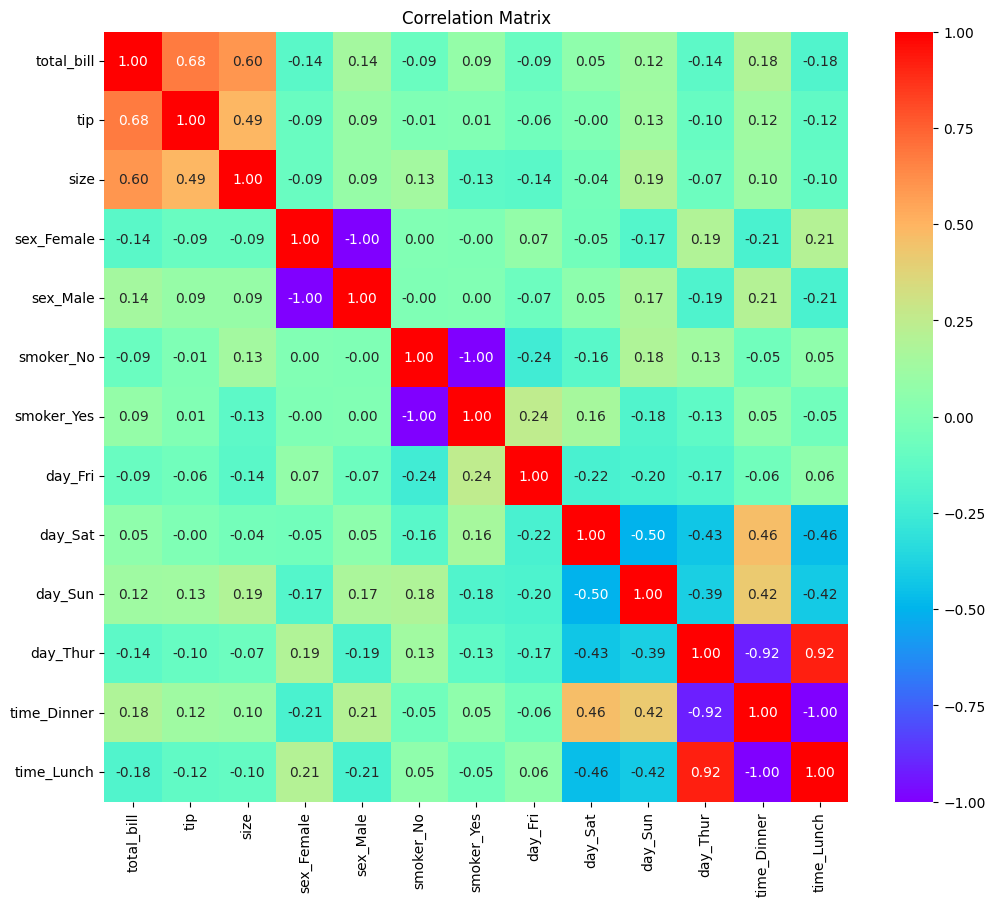

In [12]:


correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Factors that Significantly Impact Tip Amounts

**Total Bill (0.68 correlation with Tip)**:

The total bill has a strong positive correlation with the tip amount (0.68). This suggests that as the total bill increases, the tip amount also tends to increase. This is expected, as tipping is often a percentage of the bill.

**Party Size (0.49 correlation with Tip)**:

There is a moderate positive correlation between the size of the party and tip amount (0.49). Larger groups tend to leave higher tips, possibly due to larger total bills.

**Day of the Week**:

Sunday (0.13) and Saturday (0.05) show some positive correlation with tip amount, indicating that tips might be slightly higher on weekends compared to weekdays.
Days like Thursday and Friday show a weak to negligible correlation with tip amount, implying that day of the week has limited impact on tipping behavior.

**Gender and Smoking Status**:

Gender (both "Female" and "Male") and smoking status ("Smoker" and "Non-Smoker") show very weak correlations with tip amount, indicating that these factors do not significantly impact tip amounts.
The correlation for sex_Male with tip is slightly positive (0.09), while for sex_Female it's slightly negative (-0.09). This suggests that, on average, male customers may tend to leave slightly higher tips than female customers. However, since both correlations are relatively weak, the effect of gender on tipping behavior is minimal compared to other factors like total bill or party size.

**Time of Day (Dinner vs. Lunch)**:

There’s a weak negative correlation between "time_Lunch" and tip amount (-0.12), and a similarly weak positive correlation with "time_Dinner" (0.12). This might indicate that tips are slightly higher at dinner compared to lunch, potentially due to higher average bills in the evening.

**Insights for Management **

Encourage Larger Party Bookings:

Since larger groups are associated with higher tip amounts, encouraging group bookings through promotions or packages could help increase revenue and tips.

Focus on Weekend Service Quality:

With slightly higher tips on weekends, management might focus on optimizing staff allocation and service quality during these peak times to enhance the dining experience and potentially increase tips further.

Upsell During Dinner Hours:

As tips are slightly higher during dinner, management could encourage servers to focus on upselling premium items during dinner service. Enhancing the dinner experience could lead to higher bills and, consequently, higher tips.

Tip-Based Incentive Programs for High Bills:

Given the strong correlation between the total bill and tip amount, management might consider incentive programs for servers to encourage higher service quality and upselling, especially for high-bill tables.

In [13]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('tip', axis=1)
y = df['tip']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}


results_df = pd.DataFrame.from_dict(results, orient='index')


results_df



,MSE,R2 Score
Linear Regression,0.703357,0.437302
Ridge Regression,0.701743,0.438593
Lasso Regression,0.566598,0.546712
Decision Tree Regression,1.357831,-0.086289
Random Forest Regression,0.895479,0.283600
Support Vector Regression,0.530227,0.575809
K-Nearest Neighbors Regression,0.874114,0.300692


The best performing model is **Support Vector Regression**.It was chosen because it achieved the highest R-squared score (0.5758) among all evaluated models, indicating that it explains the variance in the data well and has the strongest predictive power.

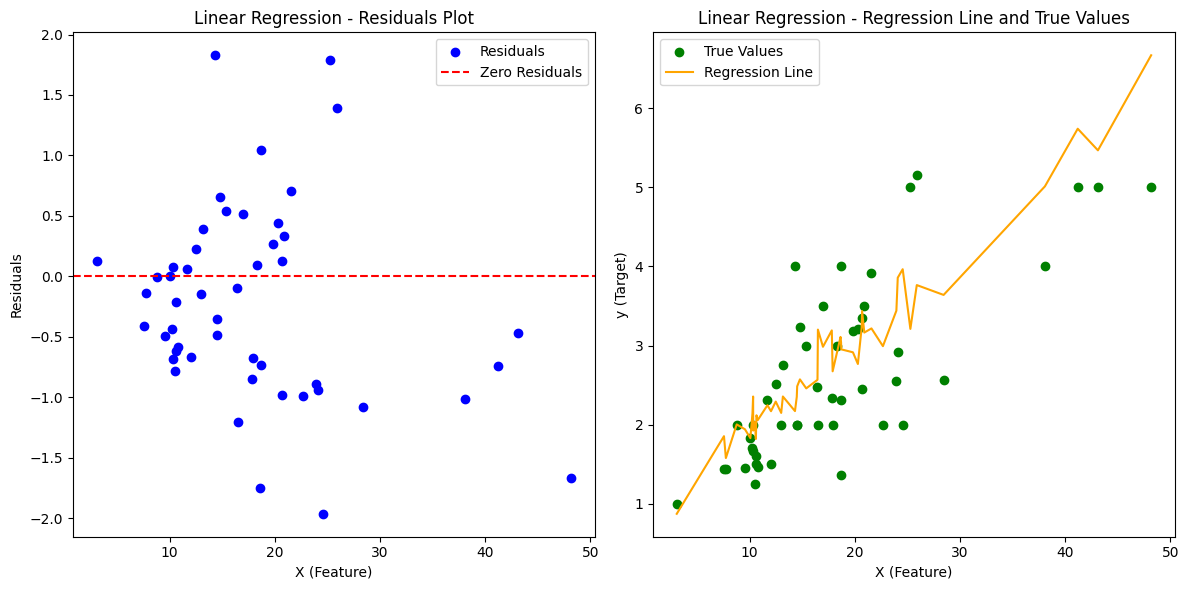

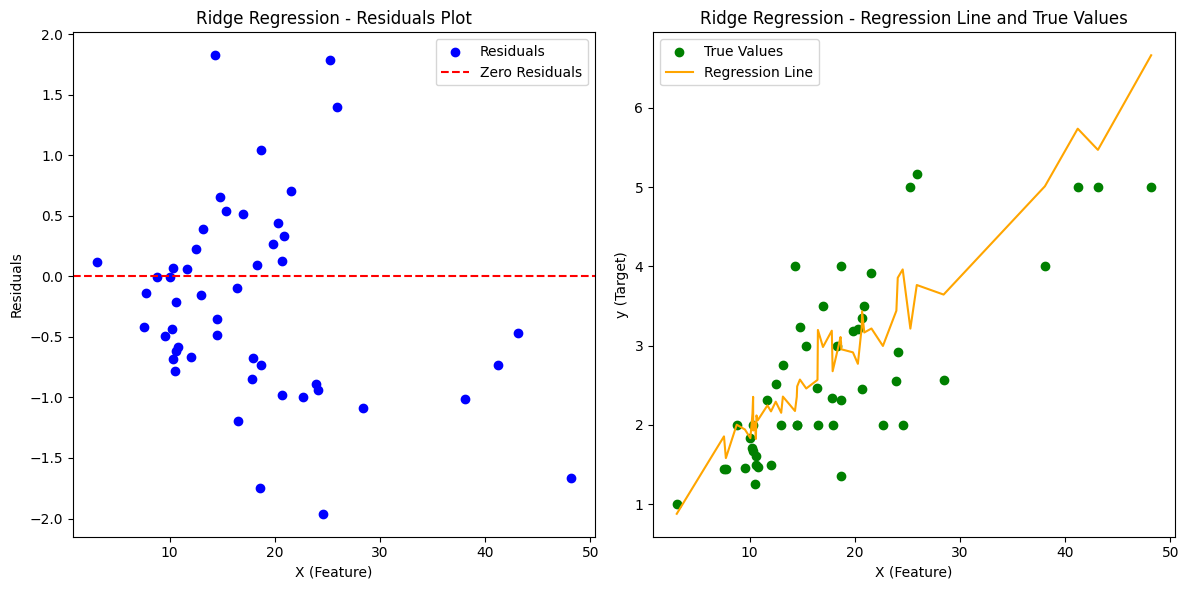

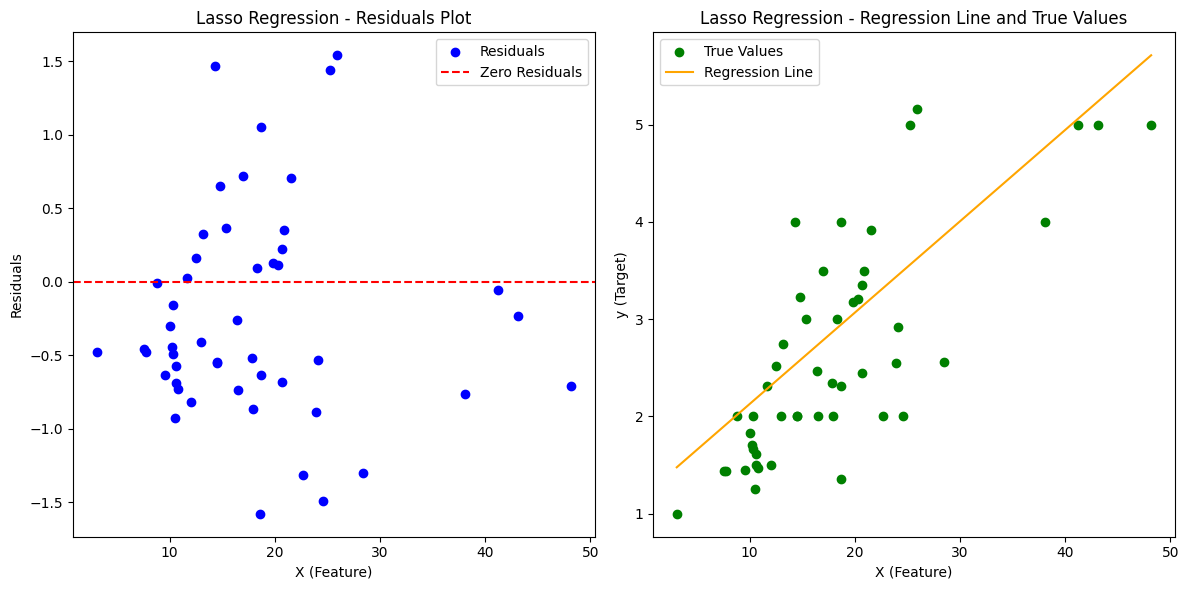

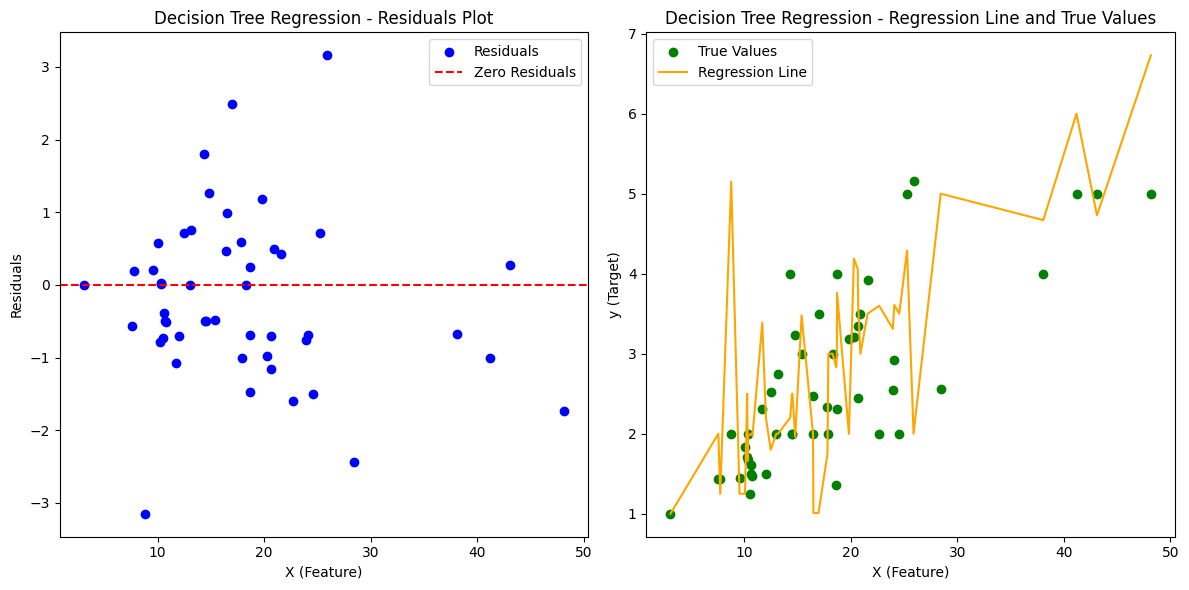

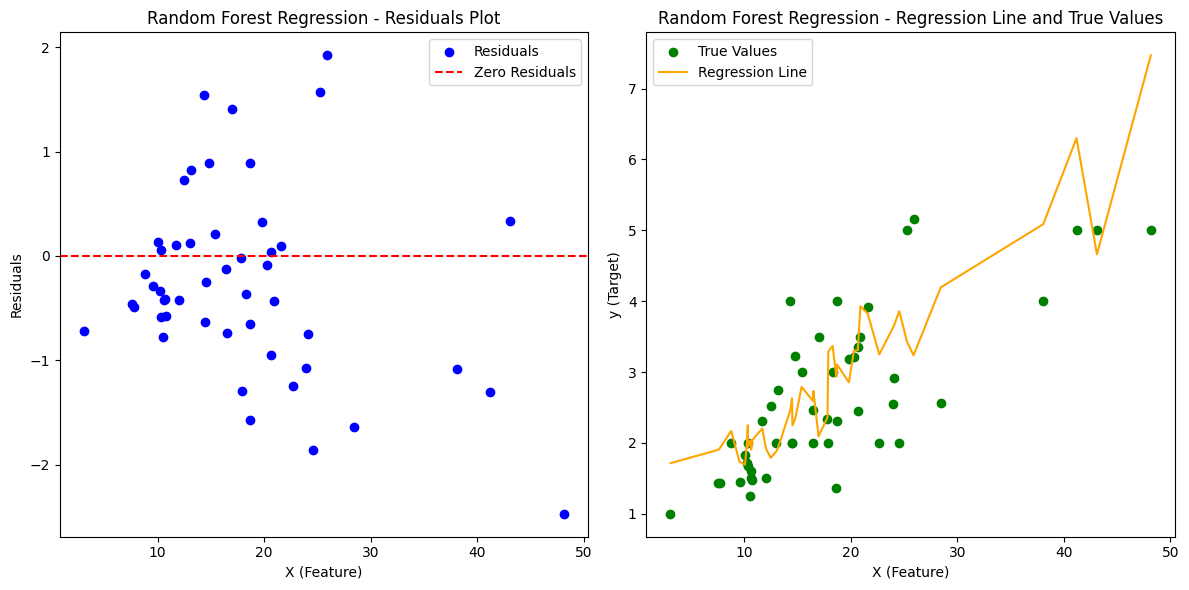

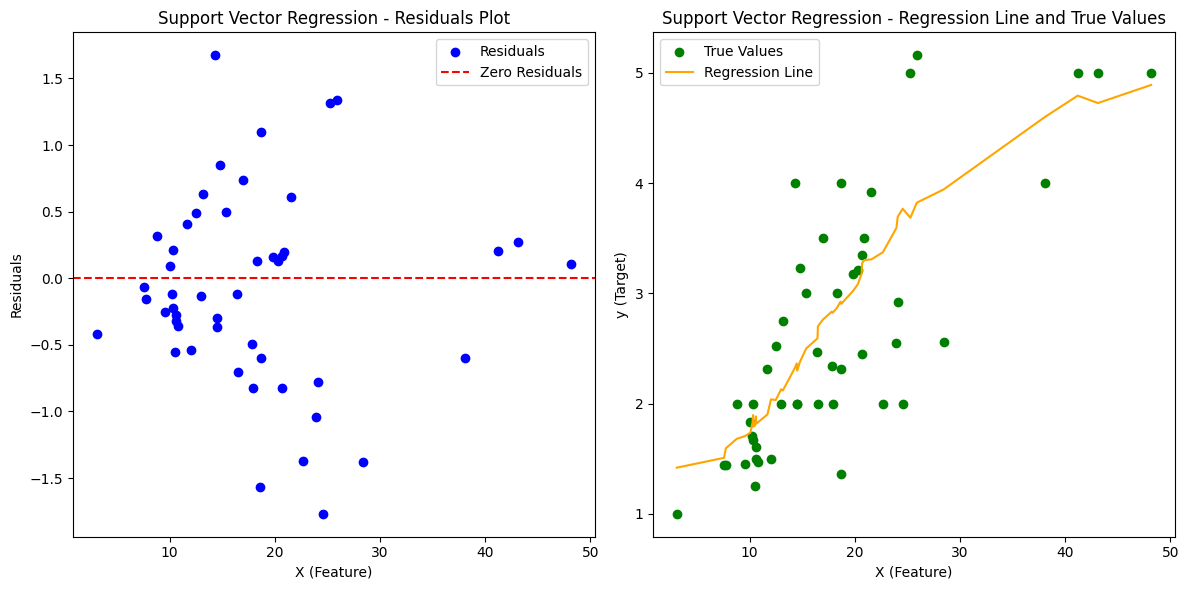

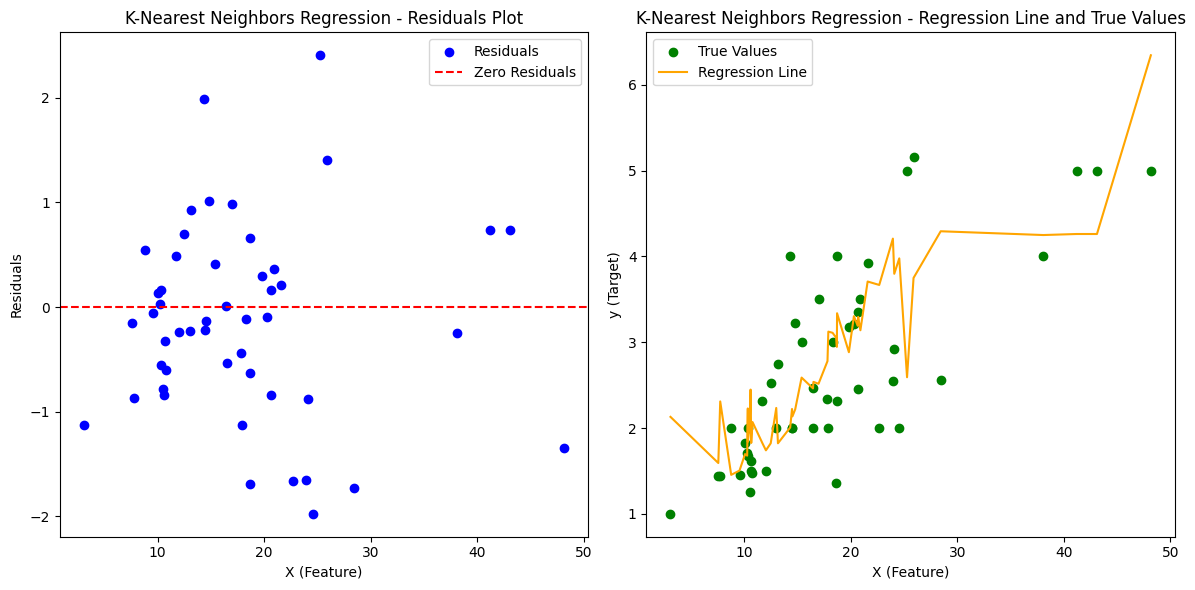

                                     MSE       MAE  R2 Score
Linear Regression               0.703357  0.667133  0.437302
Ridge Regression                0.701743  0.666672  0.438593
Lasso Regression                0.566598  0.625610  0.546712
Decision Tree Regression        1.299659  0.874490 -0.039751
Random Forest Regression        0.852924  0.721643  0.317645
Support Vector Regression       0.530227  0.567105  0.575809
K-Nearest Neighbors Regression  0.874114  0.724531  0.300692


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df.drop('tip', axis=1)  # Assuming df_encoded is your encoded data
y = df['tip']  # Assuming 'tip' is your target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse,'MAE': mae, 'R2 Score': r2}

    # Plotting Residuals and Line Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))

    # Residuals Plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_test.iloc[:, 0], residuals, color='blue', label='Residuals')  # X_test is 2D, so use the first column
    plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
    plt.title(f'{name} - Residuals Plot')
    plt.xlabel('X (Feature)')
    plt.ylabel('Residuals')
    plt.legend()

    # Line Plot of Predictions and Regression Line
    plt.subplot(1, 2, 2)
    # Plotting the true values
    plt.scatter(X_test.iloc[:, 0], y_test, color='green', label='True Values')
    # Sorting the X values for a smooth regression line plot
    sorted_idx = np.argsort(X_test.iloc[:, 0])
    plt.plot(X_test.iloc[:, 0].iloc[sorted_idx], y_pred[sorted_idx], color='orange', label='Regression Line')

    plt.title(f'{name} - Regression Line and True Values')
    plt.xlabel('X (Feature)')
    plt.ylabel('y (Target)')
    plt.legend()

    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


In [15]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune for basic Linear Regression
    'Ridge Regression': {'alpha': [0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.1, 1, 10, 100]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'Random Forest Regression': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    'Support Vector Regression': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors Regression': {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
}

tuned_results = {}


for name, model in models.items():
    print(f"Tuning {name}...")
    if param_grids[name]:  # Only tune models with a defined parameter grid
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and evaluate on test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate MSE and R2 score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        tuned_results[name] = {
            'Best Params': grid_search.best_params_,
            'MSE': mse,
            'R2 Score': r2
        }
    else:  # If no hyperparameters to tune, use the default model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        tuned_results[name] = {
            'Best Params': 'Default Parameters',
            'MSE': mse,
            'R2 Score': r2
        }


tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
tuned_results_df

Tuning Linear Regression...
Tuning Ridge Regression...
Tuning Lasso Regression...
Tuning Decision Tree Regression...
Tuning Random Forest Regression...
Tuning Support Vector Regression...
Tuning K-Nearest Neighbors Regression...


,Best Params,MSE,R2 Score
Linear Regression,Default Parameters,0.703357,0.437302
Ridge Regression,{'alpha': 100},0.631476,0.494808
Lasso Regression,{'alpha': 0.1},0.590853,0.527307
Decision Tree Regression,"{'max_depth': 10, 'min_samples_split': 20}",1.010197,0.191823
Random Forest Regression,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.966427,0.226840
Support Vector Regression,"{'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}",0.687530,0.449964
K-Nearest Neighbors Regression,"{'n_neighbors': 10, 'weights': 'distance'}",0.725809,0.419339


In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Ridge Regression': {
        'alpha': np.linspace(0.1, 10, 100)
    },
    'Lasso Regression': {
        'alpha': np.linspace(0.1, 10, 100),
        'max_iter': [500, 1000, 2000]
    },
    'Decision Tree Regression': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest Regression': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Regression': {
        'C': [0.1, 1.0, 10.0],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors Regression': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }
}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

tuned_results = {}



# Loop through each model and apply GridSearchCV
for name, model in models.items():
    print(f"Tuning {name}...")
    if param_grids[name]:  # Only tune models with a defined parameter grid
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and evaluate on the test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Calculate MSE and R² score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        tuned_results[name] = {
            'Best Params': grid_search.best_params_,
            'MSE': mse,
            'R2 Score': r2
        }
    else:  # If no hyperparameters to tune, use the default model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        tuned_results[name] = {
            'Best Params': 'Default Parameters',
            'MSE': mse,
            'R2 Score': r2
        }

# Convert the results to a DataFrame for easier viewing
tuned_results_df = pd.DataFrame.from_dict(tuned_results, orient='index')
print(tuned_results_df)


Tuning Linear Regression...
Tuning Ridge Regression...
Tuning Lasso Regression...
Tuning Decision Tree Regression...
Tuning Random Forest Regression...
Tuning Support Vector Regression...
Tuning K-Nearest Neighbors Regression...
                                                                      Best Params  \
Linear Regression                                         {'fit_intercept': True}   
Ridge Regression                                                  {'alpha': 10.0}   
Lasso Regression                                  {'alpha': 0.6, 'max_iter': 500}   
Decision Tree Regression        {'max_depth': 3, 'min_samples_leaf': 2, 'min_s...   
Random Forest Regression        {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
Support Vector Regression          {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}   
K-Nearest Neighbors Regression   {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}   

                                     MSE  R2 Score  
Linear Regression               0.703

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
